In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve


In [2]:
train_file = "TrainData.csv"
weather_file = "WeatherForecastInput.csv"
solution_file = "Solution.csv"
output_file = "ForecastTemplate2.csv"

In [3]:
#Loading the data
train_data = pd.read_csv(train_file)
weather_forecast = pd.read_csv(weather_file)
solution_data = pd.read_csv(solution_file)

In [4]:
#function to calculate wind direction
def wind_dir(U, V):
    return (270 - np.degrees(np.arctan2(V, U))) % 360

In [5]:
#Preparing training data
train_data['WindDirection'] = wind_dir(train_data['U10'], train_data['V10'])
X_train = train_data[['WS10', 'WindDirection']]
y_train = train_data['POWER']

In [6]:
#Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
#preparing the test data
weather_forecast['WindDirection'] = wind_dir(weather_forecast['U10'], weather_forecast['V10'])
X_test = weather_forecast[['WS10', 'WindDirection']]


In [8]:
#Predicting the output
predictions = model.predict(X_test)
predictions

array([ 0.35278186,  0.35906159,  0.3604764 ,  0.35531714,  0.36930461,
        0.37220174,  0.33568925,  0.22648548,  0.15838947,  0.03636161,
        0.00159319,  0.05069885,  0.07137814,  0.03547601, -0.0249989 ,
        0.04854513,  0.07236372,  0.09573544,  0.06736497, -0.02013567,
        0.01023778,  0.09085697,  0.12823159,  0.19366751,  0.42378969,
        0.4745107 ,  0.54175753,  0.61622029,  0.64523985,  0.60018125,
        0.53975664,  0.51458964,  0.51892841,  0.46821921,  0.41750394,
        0.33699424,  0.47226263,  0.57269761,  0.32638712,  0.37627475,
        0.48332154,  0.53751091,  0.47709282,  0.40148883,  0.4443809 ,
        0.5238346 ,  0.51585496,  0.50552962,  0.44861834,  0.45764789,
        0.59152863,  0.62441504,  0.60312219,  0.60201884,  0.59913388,
        0.59508835,  0.53084583,  0.46141661,  0.39646393,  0.5407979 ,
        0.55645199,  0.59600512,  0.65008363,  0.68915196,  0.71537294,
        0.73664461,  0.75200209,  0.77082587,  0.80620328,  0.87

In [9]:
#Calculating the RMSE
rmse = np.sqrt(mean_squared_error(solution_data['POWER'], predictions))
print("RMSE:", round(rmse, 4))

RMSE: 0.2149


In [10]:
# Evaluating the R² scores
print("Training set R² score:", round(model.score(X_train, y_train), 4))
print("Prediction set R² score:", round(model.score(X_test, solution_data['POWER']), 4))


Training set R² score: 0.529
Prediction set R² score: 0.4615


In [11]:
# Coefficient analysis
feature_names = ['WS10', 'WindDirection']
coeffs = pd.Series(model.coef_, index=feature_names)
print("Intercept:", model.intercept_)
print("Coefficients:")
print(coeffs)


Intercept: -0.07463178020846412
Coefficients:
WS10             0.123501
WindDirection   -0.000070
dtype: float64


In [12]:
forecast_df = pd.DataFrame({
    'TIMESTAMP': weather_forecast['TIMESTAMP'],
    'FORECAST': predictions
})
forecast_df.to_csv(output_file, index=False)
print(f"Saved forecast to {output_file}")


Saved forecast to ForecastTemplate2.csv


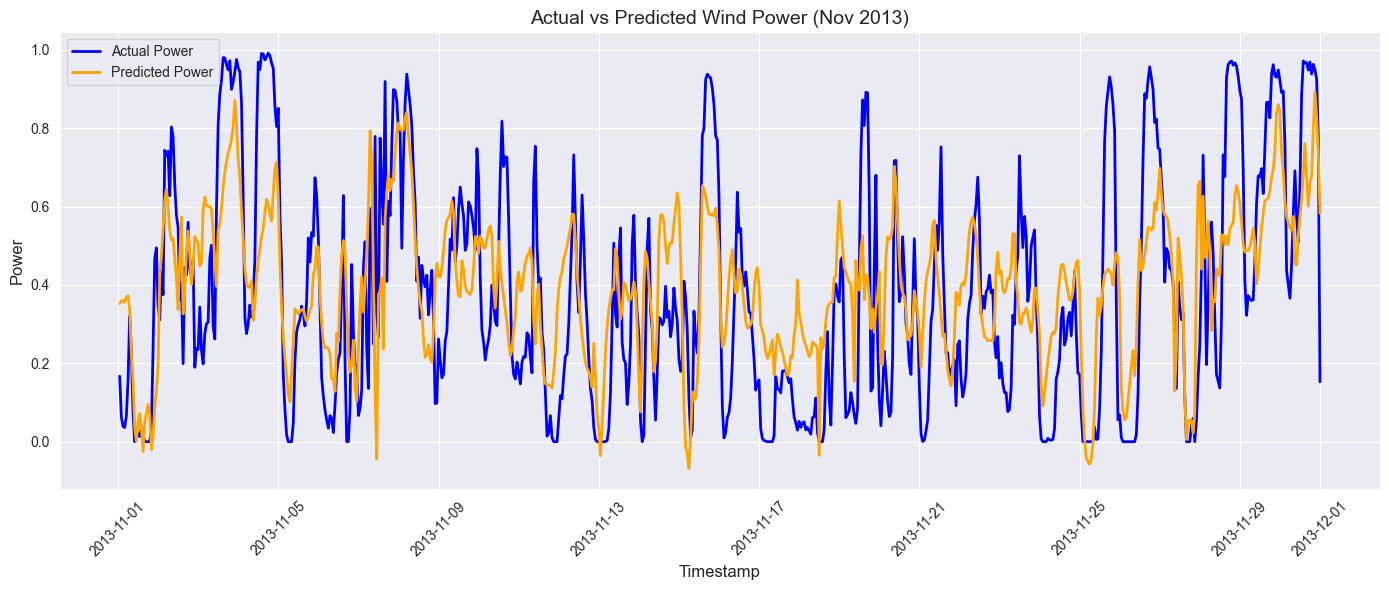

In [13]:
solution = pd.read_csv("Solution.csv")
forecast = pd.read_csv("ForecastTemplate2.csv")

# converting timestamp to datetime
solution['TIMESTAMP'] = pd.to_datetime(solution['TIMESTAMP'])
forecast['TIMESTAMP'] = pd.to_datetime(forecast['TIMESTAMP'])

merged_df = pd.merge(solution, forecast, on='TIMESTAMP')

# Plot the actual vs predicted power
plt.figure(figsize=(14, 6))
plt.plot(merged_df['TIMESTAMP'], merged_df['POWER'], label='Actual Power', color='blue', linewidth=2)
plt.plot(merged_df['TIMESTAMP'], merged_df['FORECAST'], label='Predicted Power', color='orange', linestyle='-', linewidth=2)

plt.title('Actual vs Predicted Wind Power (Nov 2013)', fontsize=14)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()